# 1. Churn Analysis - Bank Customer Churn Dataset

Neste projeto será realizado o processo de EDA (Exploratory Data Analysis) com foco na análise de Churn a partir do datas ser Bank Customer Churn Dataset, que pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset) e disponibilizado por [Gaurav Topre](https://www.kaggle.com/gauravtopre).

## 1.1. Os dados, o problema e os objetivos
### O que é Churn?

Churn pode ser traduzido de maneira livre, como a taxa de perda de clientes ao longo do tempo. É uma métrica importante para setores onde a rentabilidade depende da recorrência da compra de produtos ou renovação de serviços, como em imobiliárias focadas em aluguel, planos de assinatura em geral, entre outros. No setor bancário está perda de clientes pode ser considerada a partir de vários aspectos além do encerramento da conta como:

- Inatividade alongada;
- Redução das atividades;
- Portabilidade do crédito para outros bancos.

Portando é importante entender o que está levando os consumidores a deixar o seu serviço, para corrigir estes pontos e aumentar a retenção. Em um setor com alta concorrência e uma variedade infidável de opções como o bancário, especialmente após a explosão das fintechs, ter este controle e processos de melhoria constante da prestação de serviços é uma das chaves para a longevidade. 

### Estrutura do dataset
Os dados tratam de um banco que presta serviços internacionalmente em países europeus, e tem as seguintes colunas:
|Coluna|Descrição|
|-----|-----|
|**costumer_id**|ID do Cliente|
|**credit_score**|Score de crédito|
|**country**|País onde o cliente reside|
|**gender**|Gênero|
|**age**|Idade|
|**tenure**|Tempo de relacionamento com o banco|
|**balance**|Balanço em conta|
|**products_number**|Número de produtos contratados|
|**credit_card**|Possui cartão de crédito (booleano)|
|**active_member**|Cliente ativo (booleano)|
|**estimated_salary**|Salário estimado|
|**churn**|Churn (booleano)|

### Objetivos
Portando meu objetivo nesta análise será:
- Entender o perfil dos clientes do Banco ABC;
- Buscar entender quem está deixando o banco e o porque.

## 1.2. Importação das bibliotecas e carregamento dos dados

In [1]:
# Manipulação de dados
import numpy as np
import pandas as pd

# Análise Exploratória de Dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

# Configurações do notebook
plt.style.use('ggplot')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [2]:
df = pd.read_csv('../data/raw/data.csv')

# 2. Entendendo os dados

In [3]:
print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O DataFrame possui 10000 linhas e 12 colunas.


In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericas = df.select_dtypes(include = numerics)
nao_numericas = df.select_dtypes(exclude = numerics)

print(
    f'Temos {numericas.shape[1]} colunas numéricas e {nao_numericas.shape[1]} colunas não-numéricas'
)

Temos 10 colunas numéricas e 2 colunas não-numéricas


In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# 3. Limpeza e manipulação dos dados

## 3.1. Verificação de nulos e duplicatas

In [7]:
print(f'O conjunto de dados tem {df.isna().sum().sum()} dados nulos.')

O conjunto de dados tem 0 dados nulos.


In [8]:
print(f'O conjunto de dados tem {df.duplicated().sum()} dados duplicados.')

O conjunto de dados tem 0 dados duplicados.


Não serão necessários processos de limpeza e manipulação dos dados

# 4. Análise Exploratória de Dados

## 4.1. Os clientes

### Perfil demográfico

In [9]:
country = df['country'].value_counts(normalize = True).reset_index()
country["proportion"] = country["proportion"] * 100
country.rename(columns = {"proportion": "%"}, inplace = True)
country

,country,%
0,France,50.14
1,Germany,25.09
2,Spain,24.77


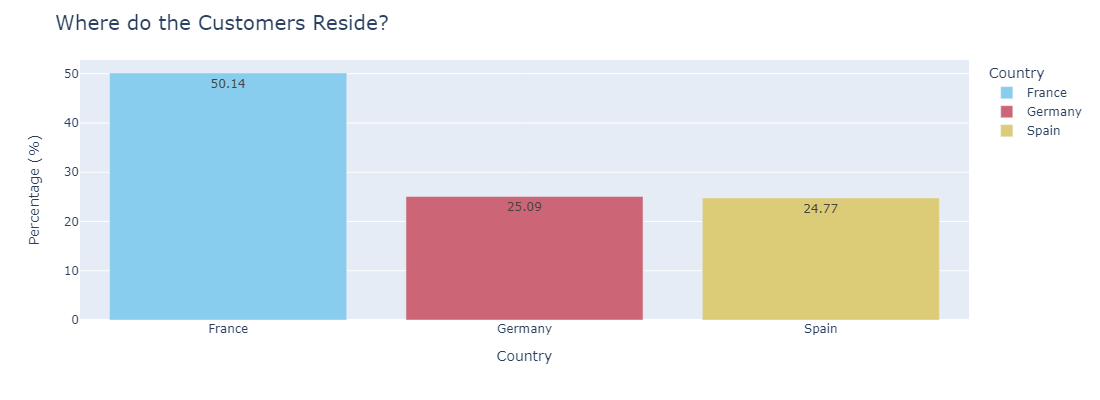

In [10]:
fig = px.bar(country, x = "country", y = "%", 
             color = "country", text_auto = True,
             color_discrete_sequence = px.colors.qualitative.Safe)

fig.update_layout(title = {"text": "Where do the Customers Reside?"}, 
                  title_font = {"size": 20},
                  xaxis_title = "Country",
                  yaxis_title = "Percentage (%)",
                  legend_title = "Country",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

In [11]:
gender = df["gender"].value_counts(normalize = True).reset_index()
gender["proportion"] = gender["proportion"] * 100
gender.rename(columns = {"proportion": "%"}, inplace = True)
gender

,gender,%
0,Male,54.57
1,Female,45.43


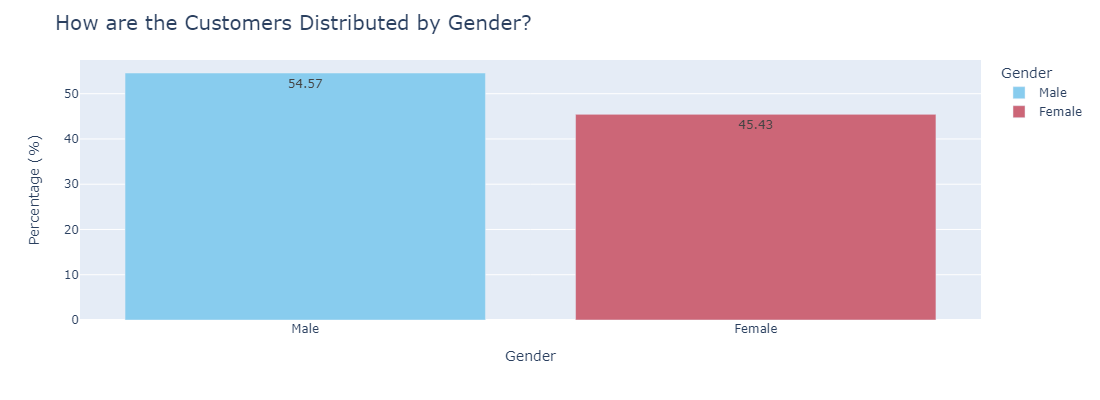

In [12]:
fig = px.bar(gender, x = "gender", y = "%", 
             color = "gender", text_auto = True,
             color_discrete_sequence = px.colors.qualitative.Safe)

fig.update_layout(title = {"text": "How are the Customers Distributed by Gender?"}, 
                  title_font = {"size": 20},
                  xaxis_title = "Gender",
                  yaxis_title = "Percentage (%)",
                  legend_title = "Gender",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

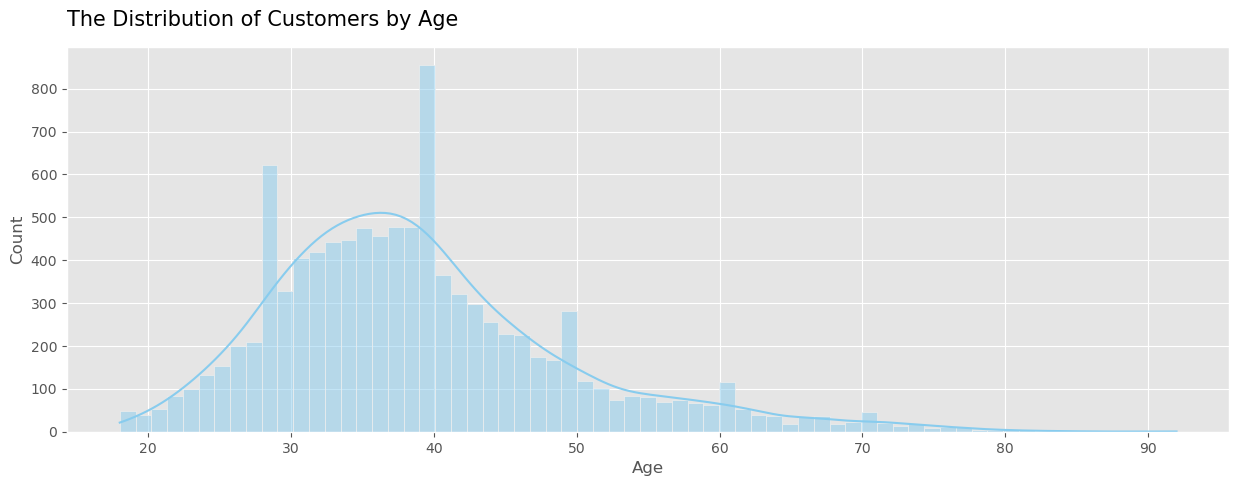

In [13]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.histplot(df, x = "age", color = "#88ccee", kde = True)
ax.set_title("The Distribution of Customers by Age", 
             pad = 15, 
             loc = "left", 
             fontsize = 15)
ax.set_xlabel("Age")
ax.set_ylabel("Count")
plt.show()

- Metade dos clientes do Banco ABC são residentes da França, o restante está dividido entre Alemanha e Espnha;
- Mais da metade dos clientes são homens;
- Os clientes tem idades variando entre 18 e 90 anos de idade, a grande massa está entre 20 e 50 anos.

### Perfil financeiro

In [14]:
df["credit_score"].value_counts().reset_index()

,credit_score,count
0,850,233
1,678,63
2,655,54
3,705,53
4,667,53
...,...,...
455,404,1
456,351,1
457,365,1
458,417,1


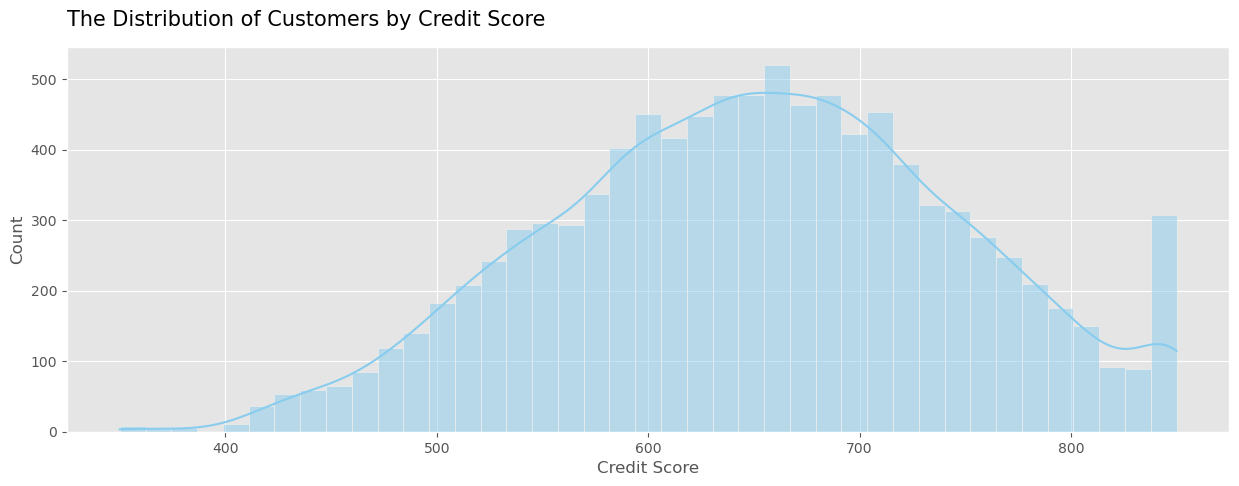

In [15]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.histplot(df, x = "credit_score", color = "#88ccee", kde = True)
ax.set_title("The Distribution of Customers by Credit Score", 
             pad = 15, 
             loc = "left", 
             fontsize = 15)
ax.set_xlabel("Credit Score")
ax.set_ylabel("Count")
plt.show()

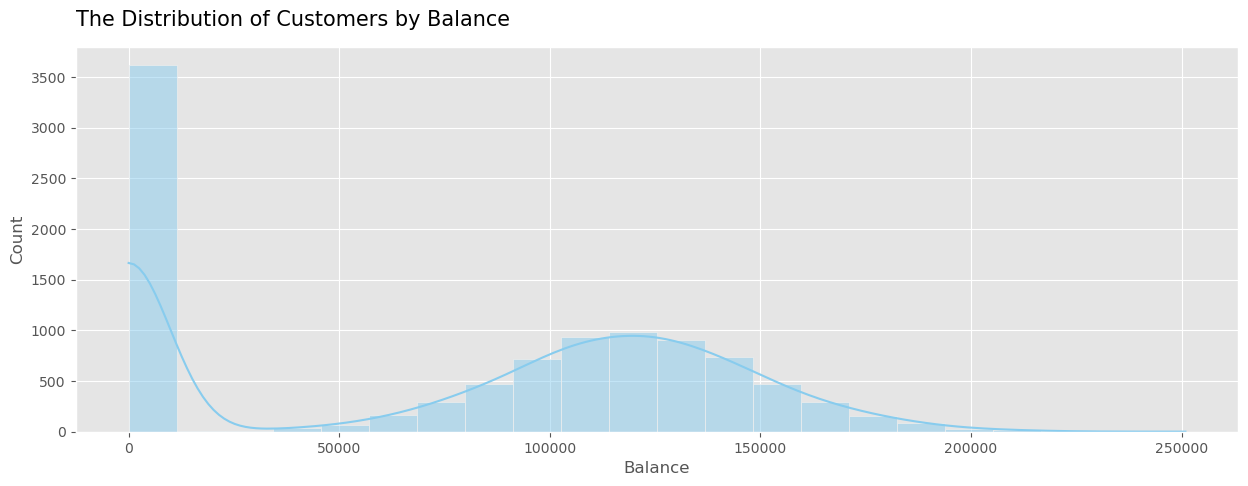

In [16]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.histplot(df, x = "balance", color = "#88ccee", kde = True)
ax.set_title("The Distribution of Customers by Balance", 
             pad = 15, 
             loc = "left", 
             fontsize = 15)
ax.set_xlabel("Balance")
ax.set_ylabel("Count")
plt.show()

In [14]:
zerob = df.query("balance == 0").copy()
zerob

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15605622,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,15657105,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,15719294,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.0,2,1,0,96270.64,0


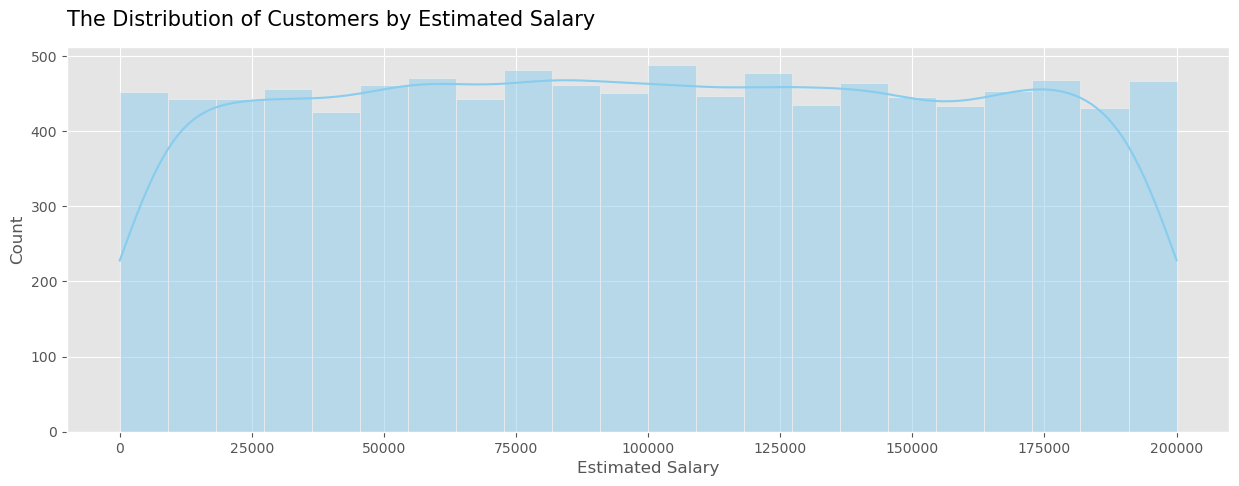

In [18]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.histplot(df, x = "estimated_salary", color = "#88ccee", kde = True)
ax.set_title("The Distribution of Customers by Estimated Salary", 
             pad = 15, 
             loc = "left", 
             fontsize = 15)
ax.set_xlabel("Estimated Salary")
ax.set_ylabel("Count")
plt.show()

In [19]:
print(f"O menor salário é {df.estimated_salary.min()} e o maior é {df.estimated_salary.max()}.")

O menor salário é 11.58 e o maior é 199992.48.


In [20]:
# O salário minimo francês é aproximadamente 1.500,00 Euros (18.000,00 anuais). 

df.query("estimated_salary <= 18000")

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
16,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
17,15788218,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0
23,15725737,669,France,Male,46,3,0.00,2,0,1,8487.75,0
58,15623944,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9954,15739850,645,France,Male,45,6,155417.61,1,0,1,3449.22,0
9958,15657771,537,France,Male,37,6,0.00,1,1,1,17802.42,0
9974,15695474,583,France,Male,33,7,122531.86,1,1,0,13549.24,0
9979,15692664,677,France,Female,58,1,90022.85,1,0,1,2988.28,0


- O banco tem diversos clientes com altos valores de score de crédito, é importante checar se estes estão entre aqueles que encerraram o relacionamento. Pessoas com crédito alto tem potencial de contratar produtos de valor elevado como empréstimos de grandes valores, financiamentos imobiliários e outros investimentos.
- Existe uma quantidade elevada de pessoas com contas zeradas, é necessário investigar a relação entre estes e o Churn.
- O salário estimado não parece ser confiável, já que existem pessoas com altos saldos em conta e salário estimado incompatível.   

### Relacionamento com o banco

In [9]:
tenure = df.tenure.value_counts().reset_index()
tenure["tenure"] = tenure["tenure"].astype(str)
tenure["%"] = df.tenure.value_counts(normalize = True) * 100
tenure

,tenure,count,%
0,2,1048,4.13
1,1,1035,10.35
2,7,1028,10.48
3,8,1025,10.09
4,5,1012,9.89
5,3,1009,10.12
6,4,989,9.67
7,9,984,10.28
8,6,967,10.25
9,10,490,9.84


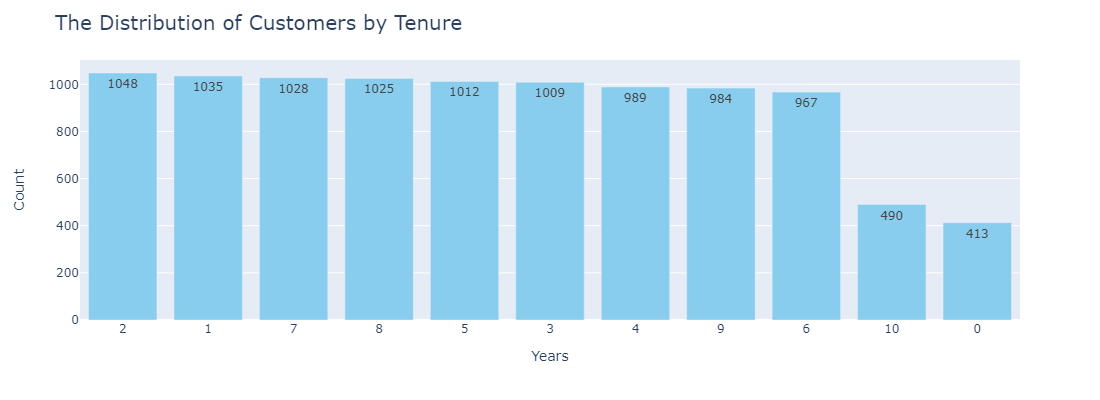

In [12]:
fig = px.bar(tenure, 
             x = "tenure", 
             y = "count", 
             text_auto = True, color_discrete_sequence = ["#88ccee"])

fig.update_layout(title = {"text": "The Distribution of Customers by Tenure"}, 
                  title_font = {"size": 20},
                  xaxis_title = "Years",
                  yaxis_title = "Count",
                  legend_title = "Tenure",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

In [23]:
product = df["products_number"].value_counts().reset_index()
product["products_number"] = product["products_number"].astype(str)
product

,products_number,count
0,1,5084
1,2,4590
2,3,266
3,4,60


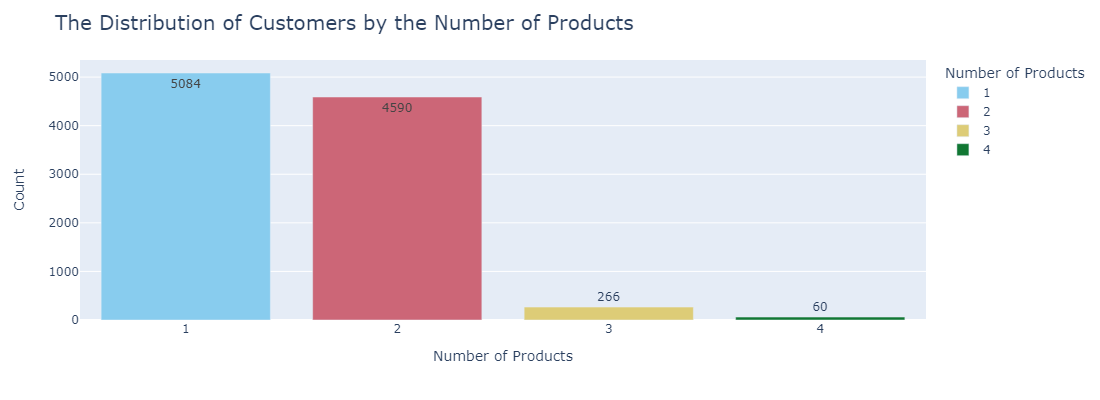

In [24]:
fig = px.bar(product, 
             x = "products_number", 
             y = "count", 
             color = "products_number", 
             color_discrete_sequence = px.colors.qualitative.Safe, 
             text_auto = True)

fig.update_layout(title = {"text": "The Distribution of Customers by the Number of Products"}, 
                  title_font = {"size": 20},
                  xaxis_title = "Number of Products",
                  yaxis_title = "Count",
                  legend_title = "Number of Products",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

In [25]:
ccard = df["credit_card"].value_counts().reset_index()
ccard["credit_card"] = ccard["credit_card"].apply(lambda i: "Yes" if i == 1 else "No")
ccard["%"] = df["credit_card"].value_counts(normalize = True).values * 100
ccard

,credit_card,count,%
0,Yes,7055,70.55
1,No,2945,29.45


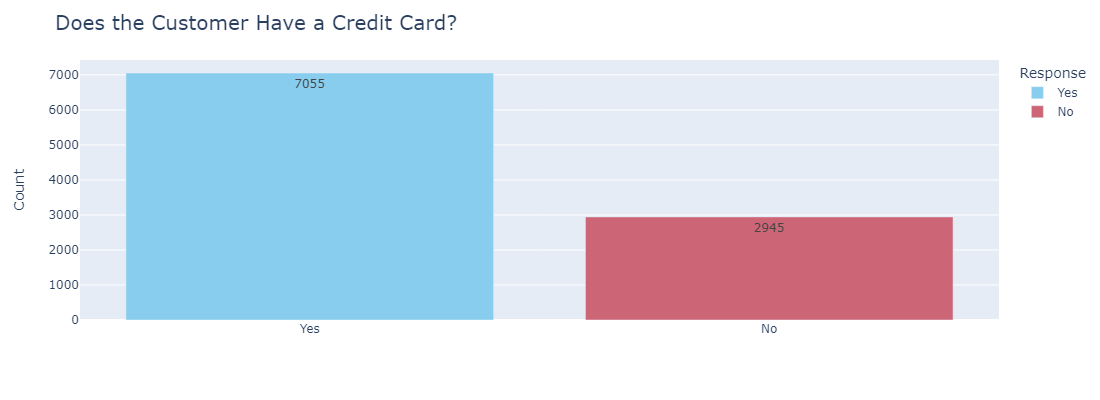

In [26]:
fig = px.bar(ccard, 
             x = "credit_card", 
             y = "count", 
             color = "credit_card", 
             color_discrete_sequence = px.colors.qualitative.Safe, 
             text_auto = True)

fig.update_layout(title = {"text": "Does the Customer Have a Credit Card?"}, 
                  title_font = {"size": 20},
                  xaxis_title = " ",
                  yaxis_title = "Count",
                  legend_title = "Response",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

In [27]:
churn = df["churn"].value_counts().reset_index()
churn["churn"] = churn["churn"].apply(lambda i: "Yes" if i == 1 else "No")
churn["%"] = df["churn"].value_counts(normalize = True).values * 100
churn

,churn,count,%
0,No,7963,79.63
1,Yes,2037,20.37


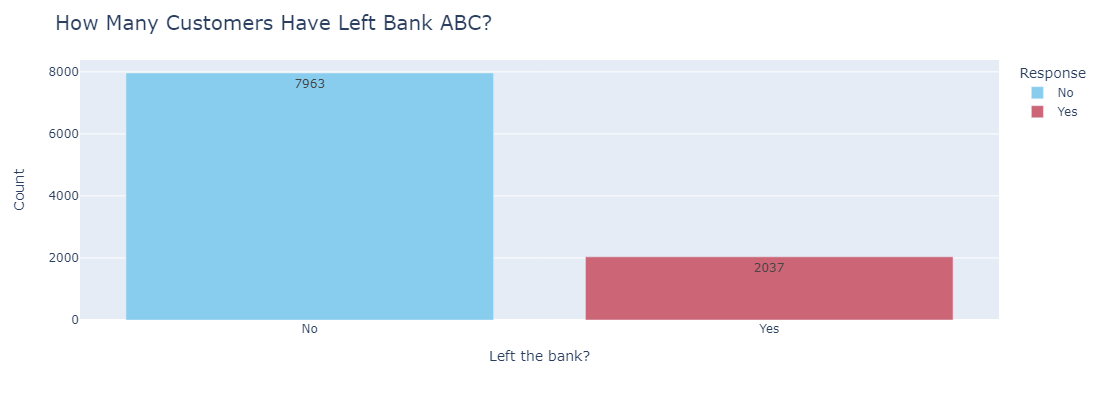

In [28]:
fig = px.bar(churn, 
             x = "churn", 
             y = "count", 
             color = "churn", 
             color_discrete_sequence = px.colors.qualitative.Safe, 
             text_auto = True)

fig.update_layout(title = {"text": "How Many Customers Have Left Bank ABC?"}, 
                  title_font = {"size": 20},
                  xaxis_title = "Left the bank?",
                  yaxis_title = "Count",
                  legend_title = "Response",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

- A grande massa dos clientes está entre 2 à 6 anos contando com os serviços do Banco ABC.
- Entre eles poucos tem mais de 2 serviços contratados, o que deve ser melhorado e pode estar ligado ao Churn.
- 70% deles tem o serviço de cartão de crédito contratado.
- 20% dos clientes deixaram o banco, é uma taxa altíssima e a seguir vamos buscar investigar o perfil destes clientes. 

## 4.2. Quem está deixando o Banco ABC?

In [29]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
credit_score,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
products_number,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
active_member,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
churn,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [30]:
churn_customers = df[df["churn"] == 1].copy()
c_churn = churn_customers.groupby("country")["churn"].count().reset_index()
c_churn.rename(columns = {"churn": "count"}, inplace = True)
c_churn

,country,count
0,France,810
1,Germany,814
2,Spain,413


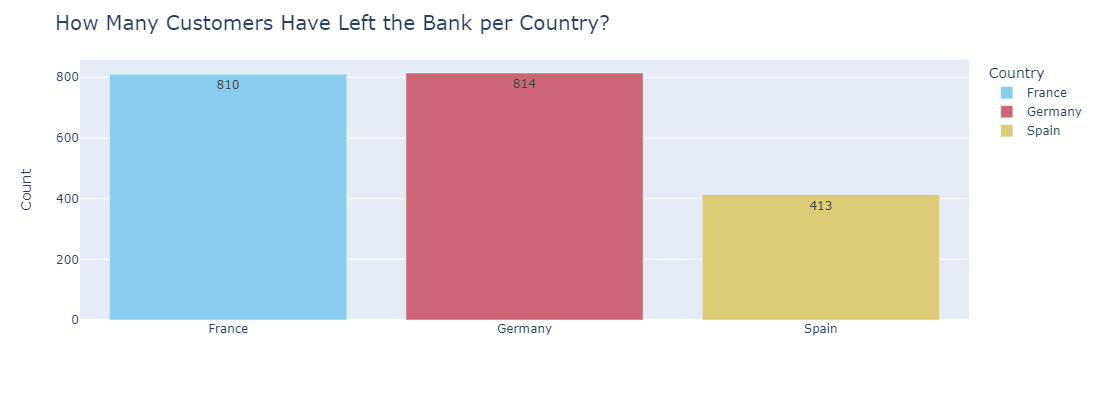

In [31]:
fig = px.bar(c_churn, 
             x = "country", 
             y = "count", 
             color = "country", 
             color_discrete_sequence = px.colors.qualitative.Safe, 
             text_auto = True)

fig.update_layout(title = {"text": "How Many Customers Have Left the Bank per Country?"}, 
                  title_font = {"size": 20},
                  xaxis_title = " ",
                  yaxis_title = "Count",
                  legend_title = "Country",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

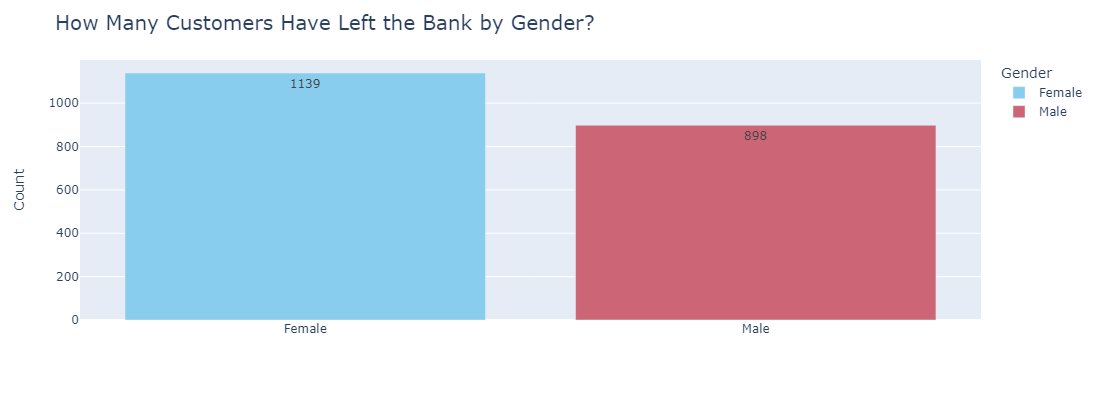

In [32]:
gen = churn_customers["gender"].value_counts().reset_index()

fig = px.bar(gen, 
             x = "gender", 
             y = "count", text_auto = True, 
             color = "gender", 
             color_discrete_sequence = px.colors.qualitative.Safe)

fig.update_layout(title = {"text": "How Many Customers Have Left the Bank by Gender?"}, 
                  title_font = {"size": 20},
                  xaxis_title = " ",
                  yaxis_title = "Count",
                  legend_title = "Gender",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

- O maior número de clientes que deixaram o banco está na Alemanha, que corresponde somente a cerca de 25% da base clientes. França é onde está metade da base de clientes, é esperado que boa parte dos número venham de lá mas precisamos buscar soluções para diminuir o Churn em relação à alemães.
- Apesar de mais da metade dos clientes do banco serem do sexo masculino, são mulheres quem mais abandonou o banco é necessário investigar as razões para isso.

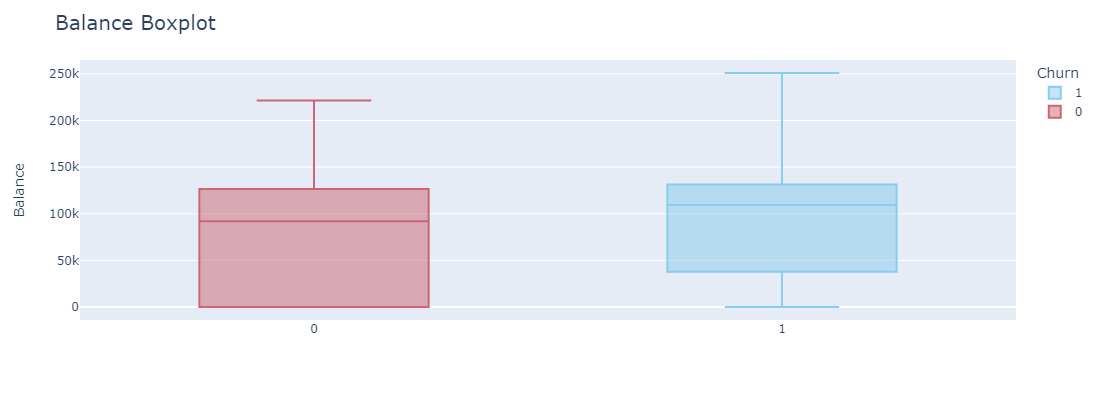

In [33]:
fig = px.box(df, 
             x = "churn", 
             y = "balance", 
             color_discrete_sequence = px.colors.qualitative.Safe,
             color = "churn")

fig.update_layout(title = {"text": "Balance Boxplot"}, 
                  title_font = {"size": 20},
                  xaxis_title = " ",
                  yaxis_title = "Balance",
                  legend_title = "Churn",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

In [16]:
zerob = zerob.groupby("churn")["balance"].count().reset_index()
zerob["churn"] = zerob["churn"].apply(lambda i: "Yes" if i == 1 else "No")
zerob.rename(columns = {"balance": "count"}, inplace = True)
zerob

,churn,count
0,No,3117
1,Yes,500


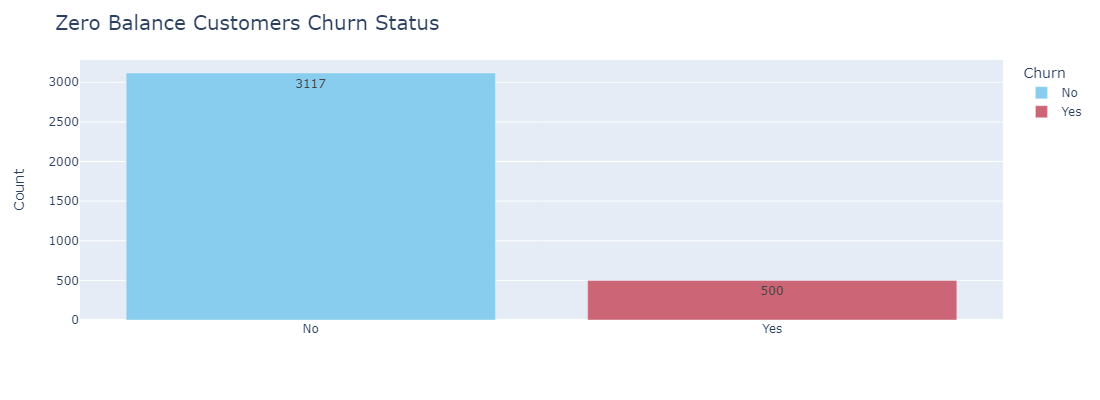

In [17]:
fig = px.bar(zerob, 
             x = "churn", 
             y = "count", 
             color = "churn",
             color_discrete_sequence = px.colors.qualitative.Safe, 
             text_auto = True)

fig.update_layout(title = {"text": "Zero Balance Customers Churn Status"}, 
                  title_font = {"size": 20},
                  xaxis_title = " ",
                  yaxis_title = "Count",
                  legend_title = "Churn",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

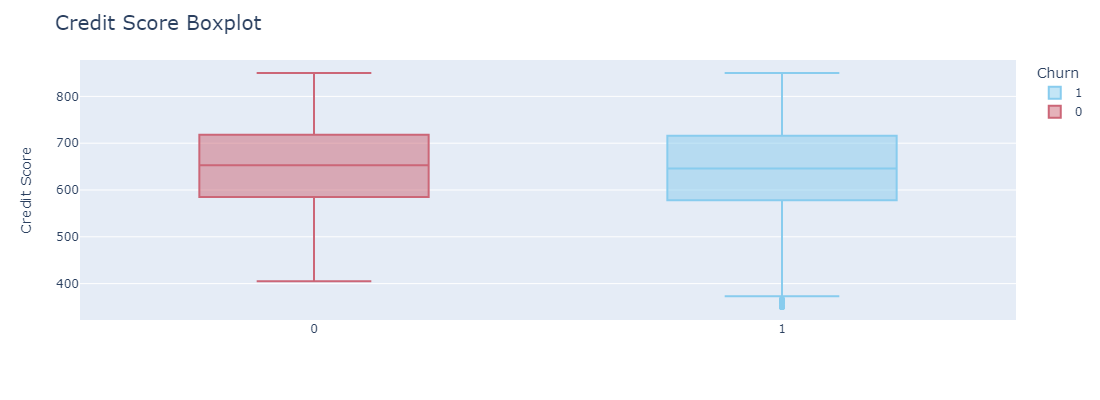

In [35]:
fig = px.box(df, 
             x = "churn", 
             y = "credit_score", 
             color_discrete_sequence = px.colors.qualitative.Safe,
             color = "churn")

fig.update_layout(title = {"text": "Credit Score Boxplot"}, 
                  title_font = {"size": 20},
                  xaxis_title = " ",
                  yaxis_title = "Credit Score",
                  legend_title = "Churn",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

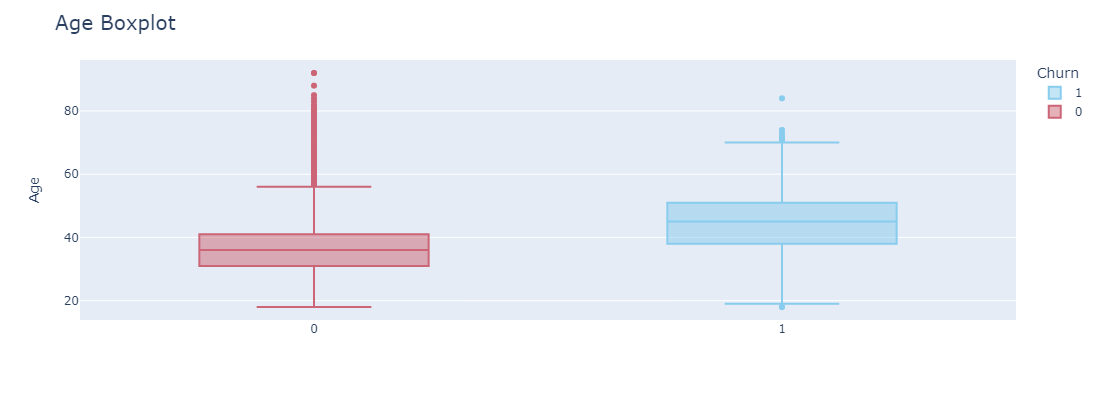

In [36]:
fig = px.box(df, 
             x = "churn", 
             y = "age", 
             color_discrete_sequence = px.colors.qualitative.Safe,
             color = "churn")

fig.update_layout(title = {"text": "Age Boxplot"}, 
                  title_font = {"size": 20},
                  xaxis_title = " ",
                  yaxis_title = "Age",
                  legend_title = "Churn",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

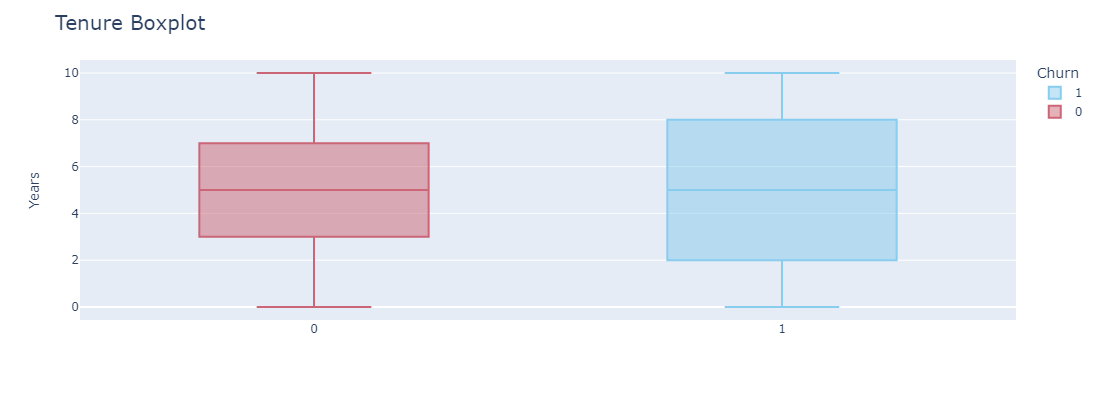

In [37]:
fig = px.box(df, 
             x = "churn", 
             y = "tenure", 
             color_discrete_sequence = px.colors.qualitative.Safe,
             color = "churn")

fig.update_layout(title = {"text": "Tenure Boxplot"}, 
                  title_font = {"size": 20},
                  xaxis_title = " ",
                  yaxis_title = "Years",
                  legend_title = "Churn",
                  width = 1100,
                  height = 400)

fig.show(renderer = "png")

- Pessoas que estão deixando o banco tem uma média maior de dinheiro em conta, isso é preocupanete pois além de maior saldo estes clientes tem bom score de crédito ou seja, tem potencial parar contratar produtos e realizar investimento de alto valor. 
- Estes clientes também tem uma média de idade e de tempo de relacionamento com o banco maiores, o que direciona o problema para o atendimento à pessoas mais velhas.
- A margem de clientes com zero dinheiro em conta que abandonou a empresa é baixa, estes devem também ser trabalhados para trazer seu dinheiro  para o Banco ABC e contratar seus produtos.

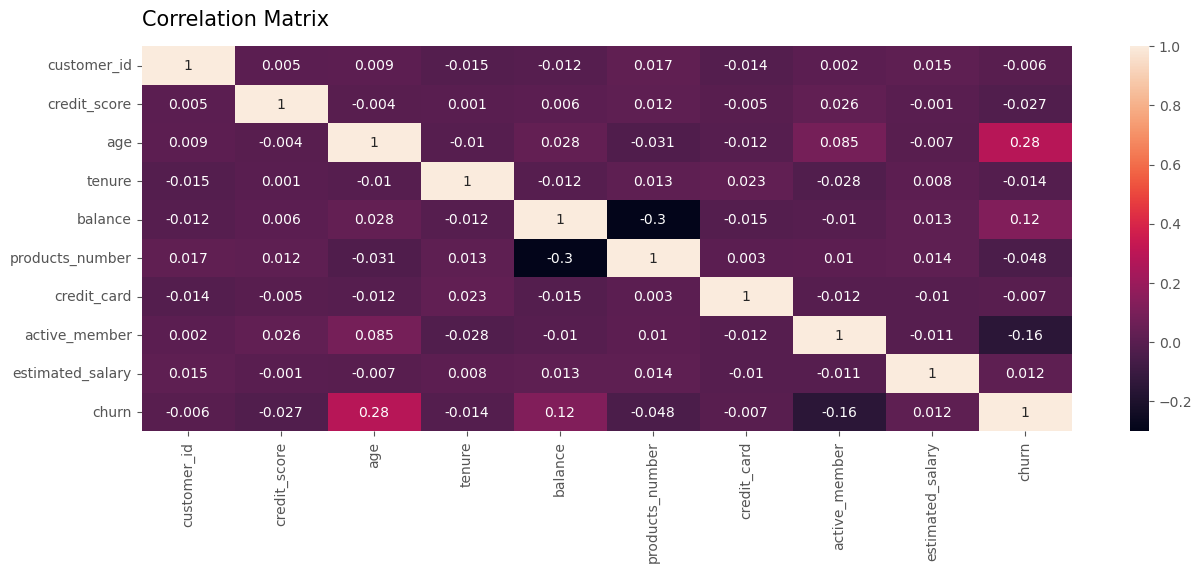

In [38]:
corr = df.corr(numeric_only = True).round(3)

fig, ax = plt.subplots(figsize = (15, 5))

sns.heatmap(corr, annot = True)
ax.set_title("Correlation Matrix", 
             pad = 15, 
             loc = "left", 
             fontsize = 15)
plt.show()

O fator de correlação mais forte de acordo com a matriz, é a idade apontando novamente a necessidade de atenção com clientes mais velhos.

# 5. Conclusões

![Image](https://images.unsplash.com/photo-1509470475192-4516c145f8a1?q=80&w=2071&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

No setor bancário medir a taxa de perda de clientes, também é medir a saúde do negócio. Bancos dependem da movimentação financeira constante e da confiança de seus clientes, com tantas opções e facilidades de abertura de contas existem pequenos detalhes como uma instabilidade no aplicativo do banco ou demora em um atendimento, levam pessoas a buscarem outras instituições. Com a digitalização cada vez maior do mercado financeiro, o surgimento das fintechs e outras mudanças, algumas pessoas não necessariamente irão conseguir acompanhar este ritmo. Nesta análise conseguir extrair os seguintes insights e pontos de melhora:

- Os clientes de idade avançada, com maior saldo em conta e mais tempo de relacionamento estão entre aqueles que mais estão abandonando os serviços do Banco ABC, o fator idade é o mais importante e portando é necessário buscar melhorar o atendimento aos mais velhos;
- Mulheres são a maioria entre estes clientes então melhorar o atendimento a esse público também é de suma importância;
- É preciso também buscar as razões para a taxa ser tão alta entre os alemães, buscar entender se fatores culturais na forma de atendimento e prestação de serviços é onde o Banco ABC está falhando;
- Acredito que o setor de marketing e gestão de relacionamento deve procurar meios de incentivar clientes com saldo em conta zerado a trazerem seu dinheiro para o Banco ABC;
- A forma como os salários são estimados deve ser melhorada para análises futuras.